In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# A Brief matplotlib API Primer

In [4]:
data = np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

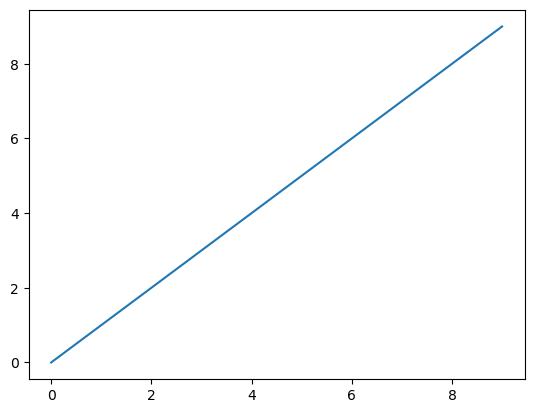

In [6]:
plt.plot(data)

## Figures and Subplots

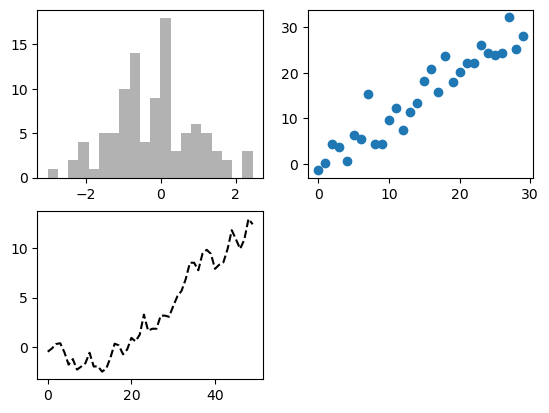

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))

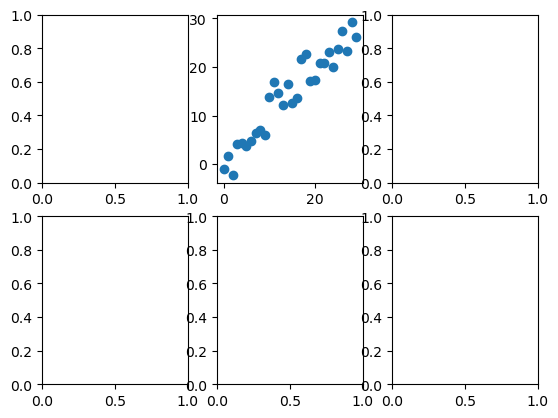

In [8]:
fig, axes = plt.subplots(2, 3)
axes[0, 1].scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))

## Adjusting spacing around subplots

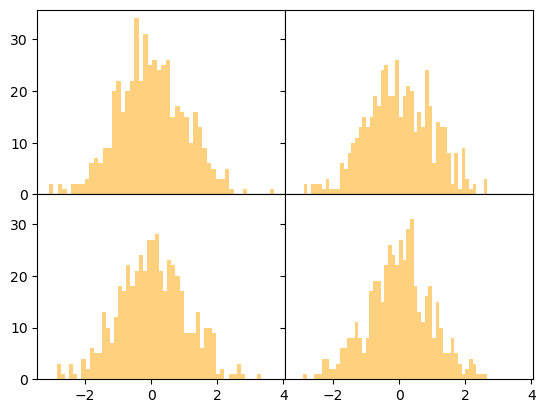

In [46]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color="orange", alpha=0.5)

fig.subplots_adjust(wspace=0, hspace=0)

In [10]:
plt.plot?

## Colors, Markers and Line Styles

In [11]:
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker=0)

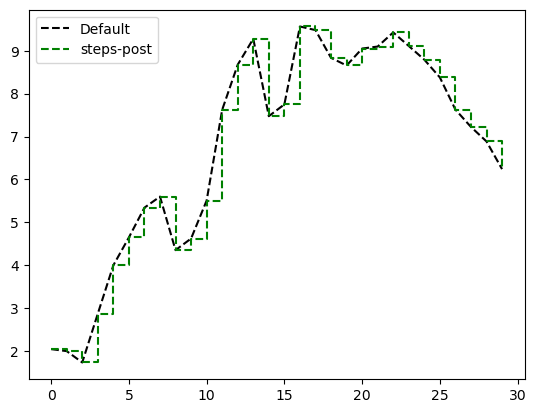

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()

ax.plot(data, color="black", linestyle="dashed", label="Default")
ax.plot(data, color="green", linestyle="dashed",
       drawstyle="steps-post", label="steps-post")
ax.legend()

## Ticks, Labels, and Legends

Text(0.5, 1.0, 'My first matplotlib plot')

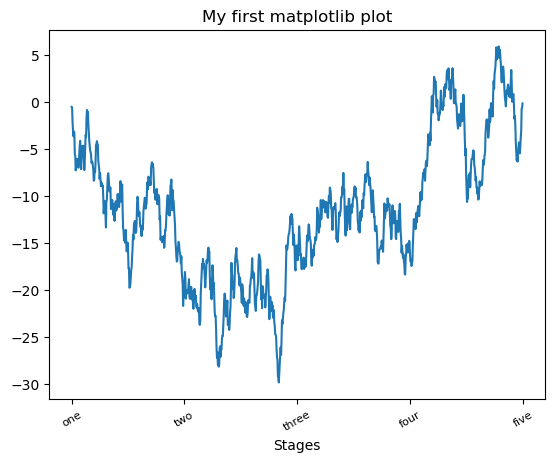

In [19]:
# Setting the title, axis labels, ticks and tick labels

fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")


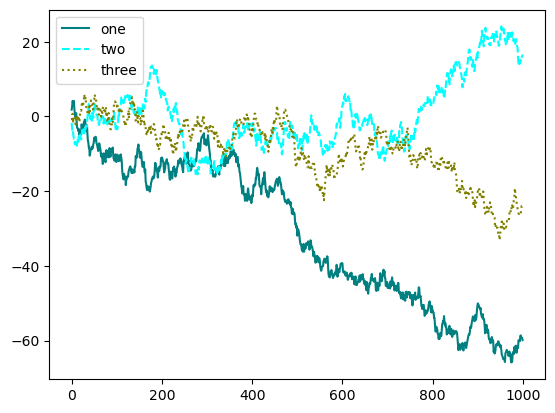

In [37]:
# Adding legends

fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="teal", label="one")
ax.plot(np.random.randn(1000).cumsum(), color="cyan", linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), color="olive", linestyle="dotted", label="three")
ax.legend()

## Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

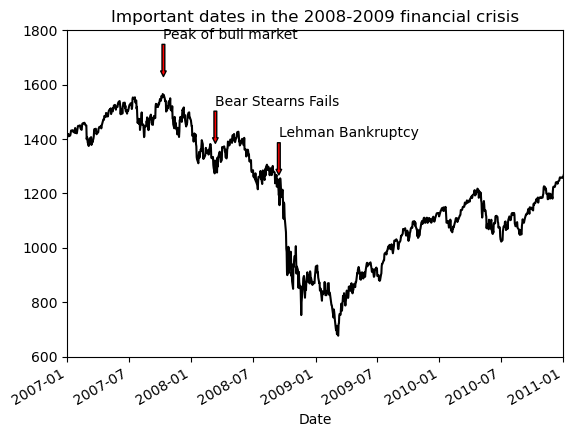

In [43]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 255),
               arrowprops=dict(facecolor="red", headwidth=4, width=2, headlength=4),
               horizontalalignment="left", verticalalignment="top")
    
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

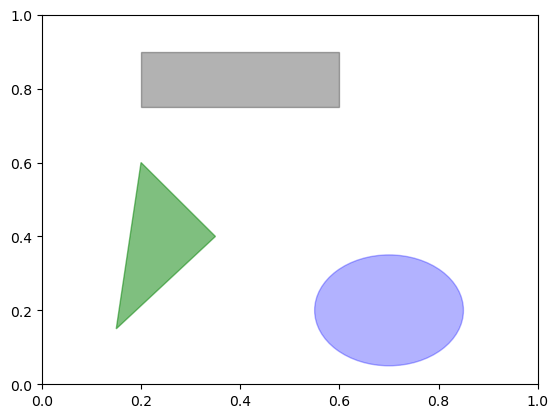

In [44]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)


## Saving plots to a file

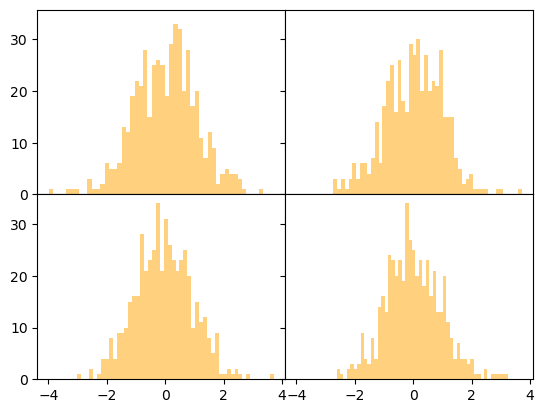

In [47]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color="orange", alpha=0.5)

fig.subplots_adjust(wspace=0, hspace=0)

fig.savefig("figpath.png", dpi=400)

## matplotlib Configuration

# Plotting with pandas and seaborn

## Line Plots

<Axes: >

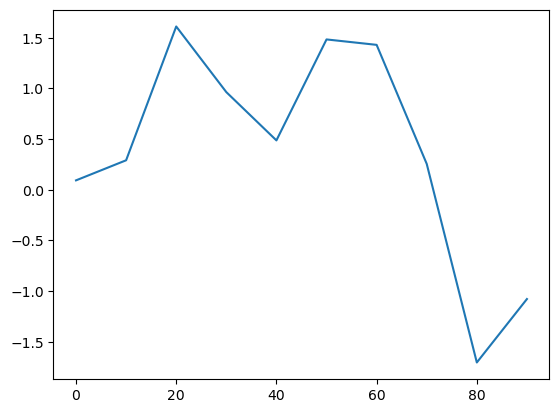

In [48]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))

s.plot()

<Axes: >

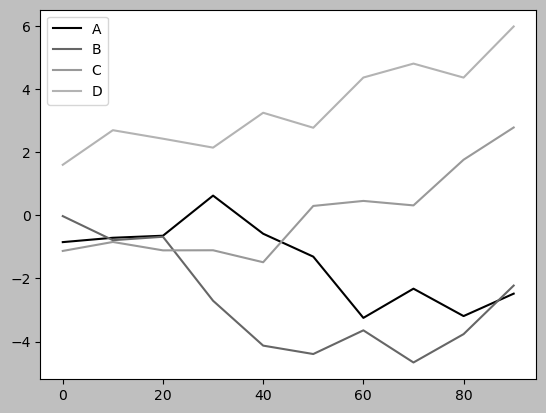

In [49]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0), 
                 columns=["A", "B", "C", "D"],
                 index=np.arange(0, 100, 10))

plt.style.use('grayscale')
df.plot()

## Bar Plots

<Axes: >

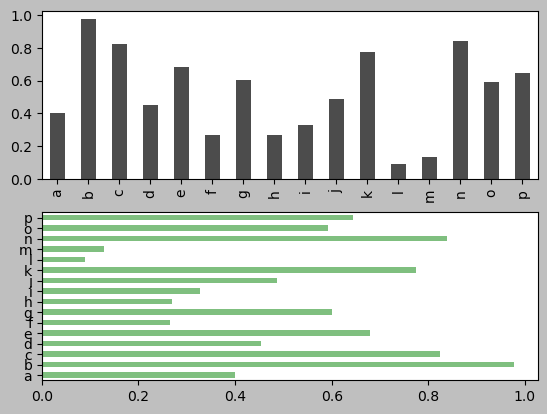

In [54]:
fix, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="black", alpha=0.7)

data.plot.barh(ax=axes[1], color="green", alpha=0.5)

In [55]:
df = pd.DataFrame(np.random.uniform(size=(6,4)),
                 index=["one", "two", "three", "four", "five", "six"],
                 columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.834637,0.501516,0.192901,0.782372
two,0.859964,0.753503,0.143196,0.824020
three,0.064123,0.932469,0.092114,0.931820
four,0.266008,0.795993,0.314534,0.109837
five,0.268680,0.712576,0.629215,0.045932
six,0.835032,0.475170,0.257977,0.443050


<Axes: >

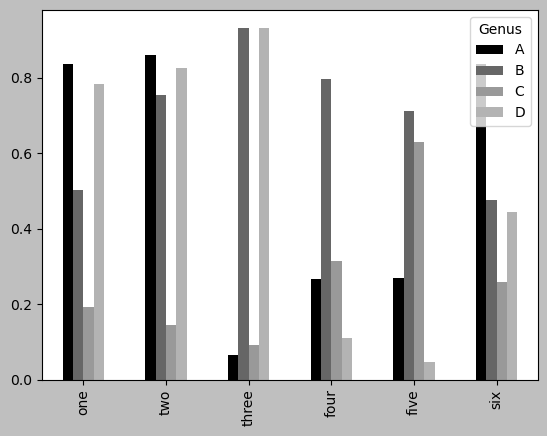

In [56]:
df.plot.bar()

<Axes: >

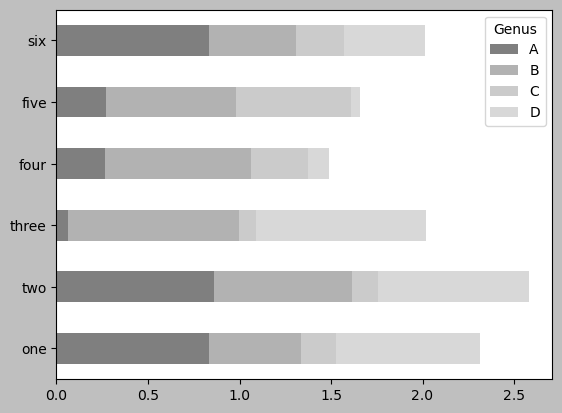

In [57]:
df.plot.barh(stacked=True, alpha=0.5)

In [58]:
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [59]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [60]:
party_counts = party_counts.loc[:, 2:5]

party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")

party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

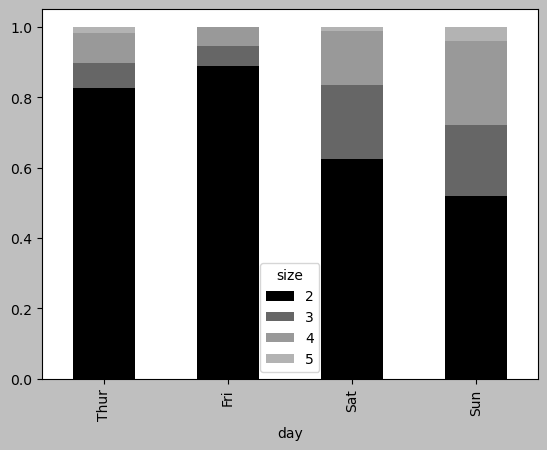

In [61]:
party_pcts.plot.bar(stacked=True)

In [63]:
import seaborn as sns

tips["tip_pct"] = tips["tip"]/(tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

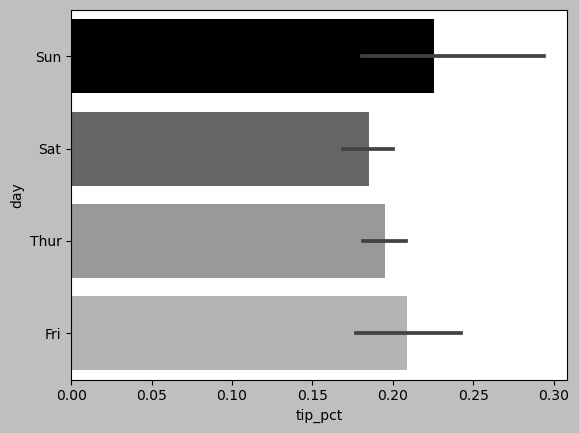

In [64]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

<Axes: xlabel='tip_pct', ylabel='day'>

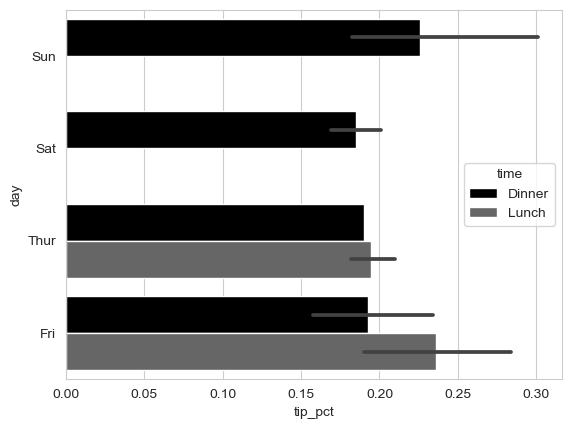

In [70]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")
sns.set_style("whitegrid")

## Histograms and Density Plots

<Axes: ylabel='Frequency'>

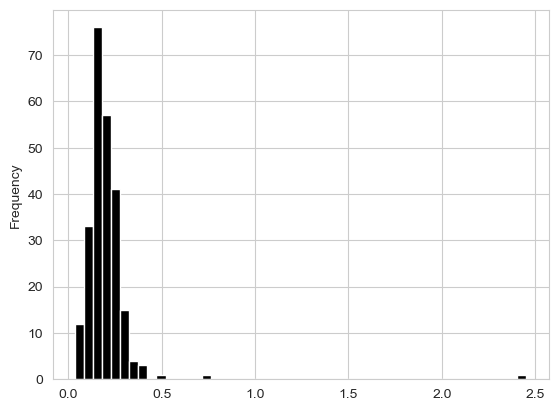

In [71]:
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

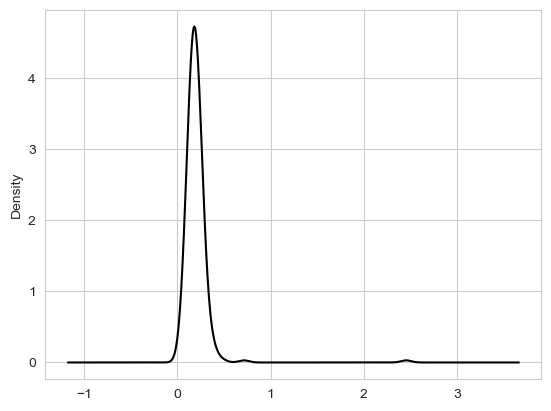

In [73]:
tips["tip_pct"].plot.density()

<Axes: ylabel='Count'>

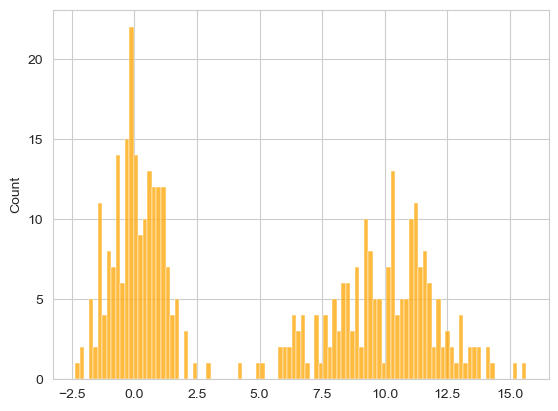

In [76]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="orange")

## Scatter or Point Plots

In [78]:
macro = pd.read_csv("examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

trans_data = np.log(data).diff().dropna()

In [79]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


TypeError: 'Text' object is not callable

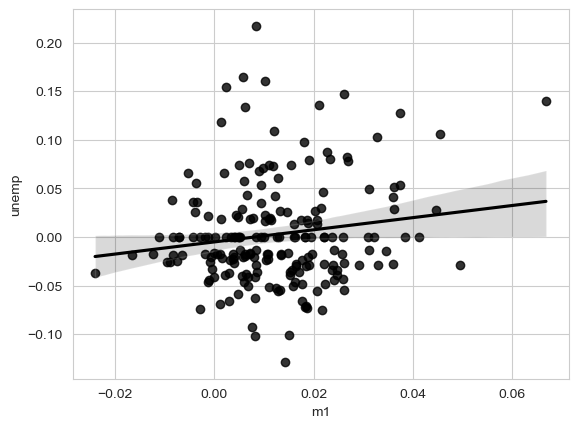

In [80]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.title("Changes in log(m1) versus log(unemp)")

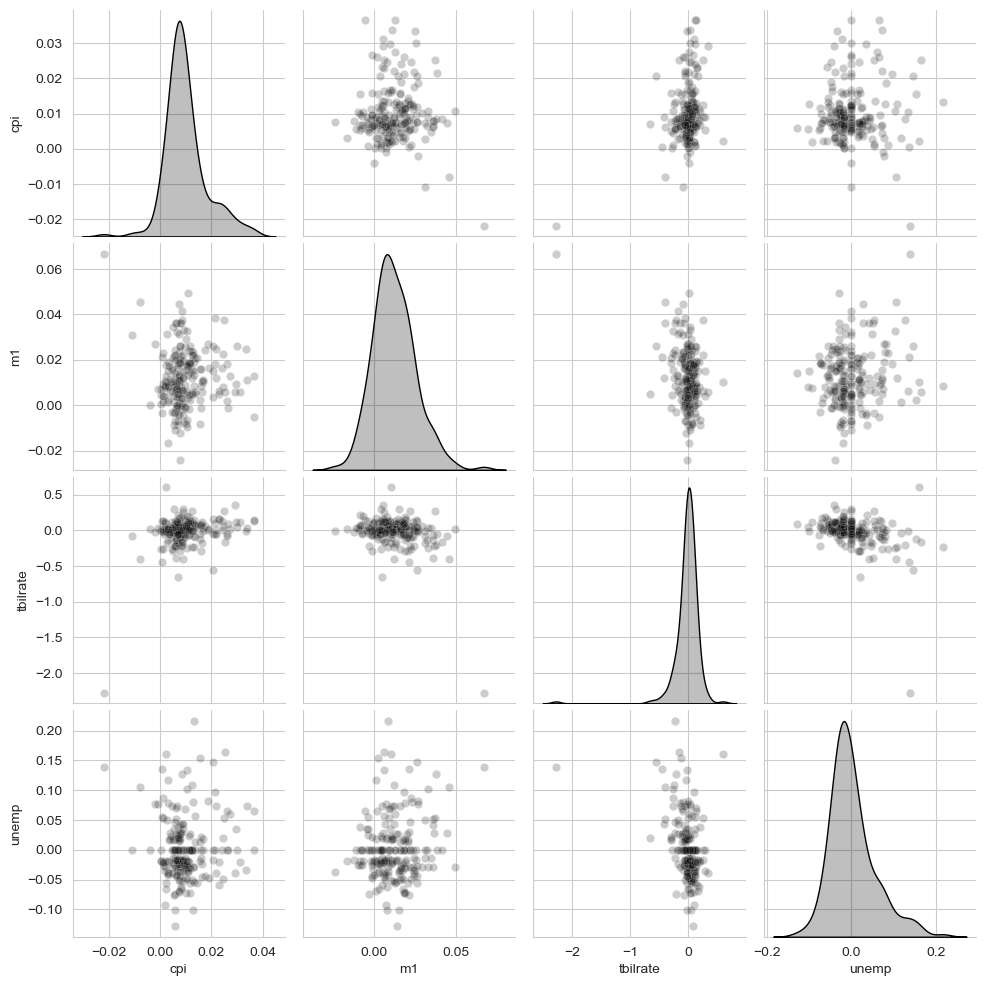

In [81]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

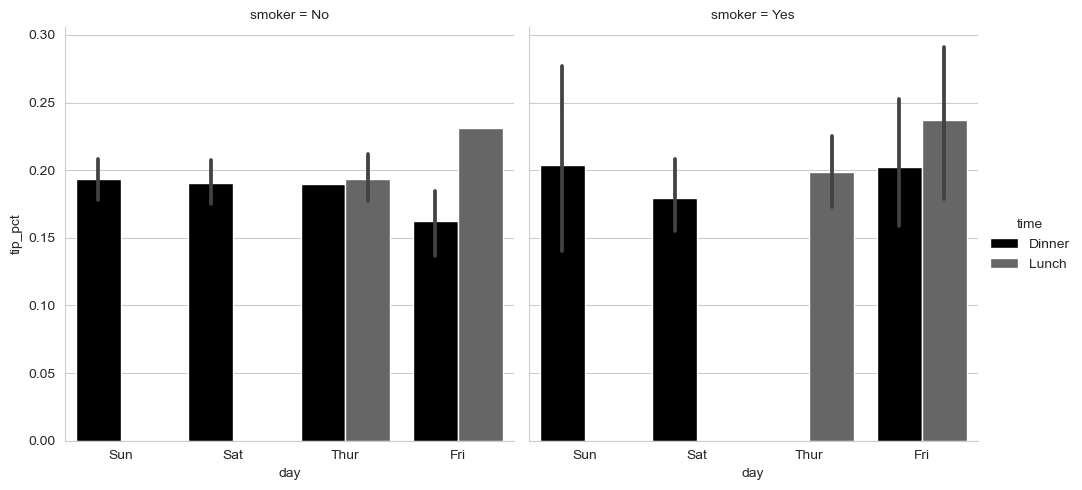

In [82]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

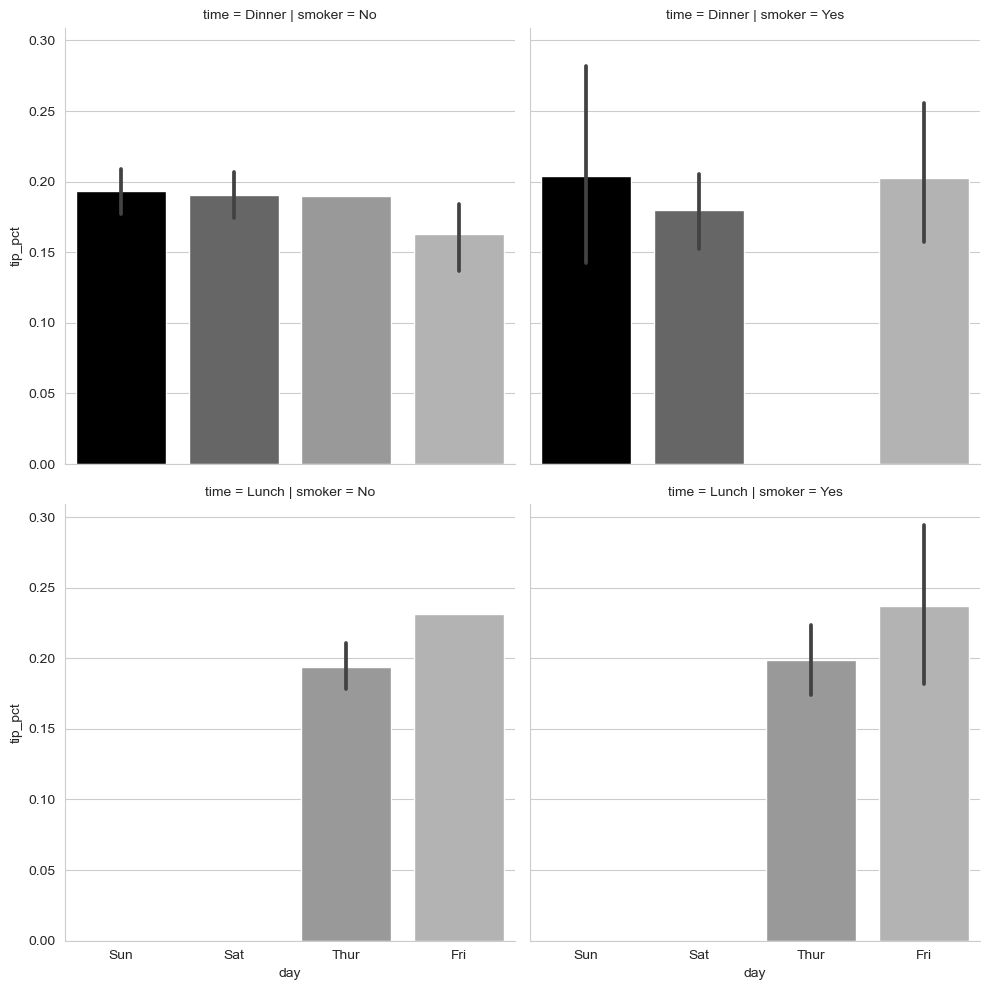

In [84]:
sns.catplot(x="day", y="tip_pct", row="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

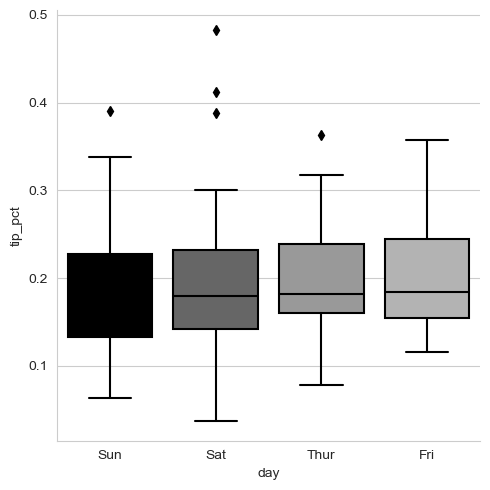

In [85]:
sns.catplot(x="day", y="tip_pct", kind="box", data=tips[tips.tip_pct < 0.5])